<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


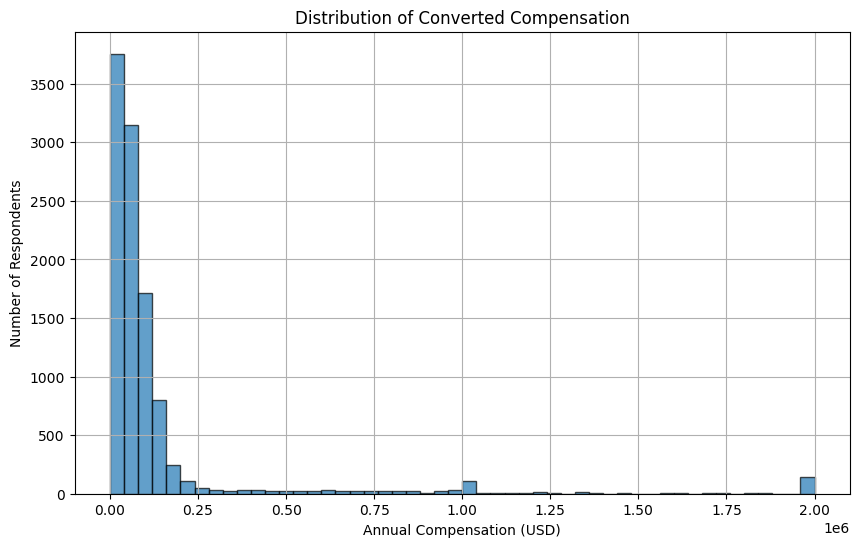

In [7]:
# your code goes here
import matplotlib.pyplot as plt

# Filtrar los valores nulos
compensation = df['ConvertedComp'].dropna()

# Trazar la curva de distribución
plt.figure(figsize=(10, 6))
plt.hist(compensation, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()


Plot the histogram for the column `ConvertedComp`.


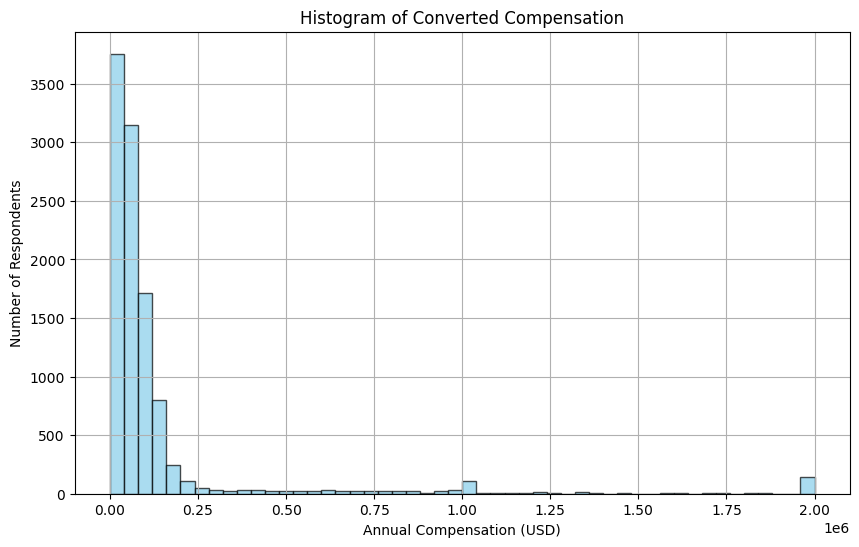

In [8]:
# your code goes here
compensation = df['ConvertedComp'].dropna()

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(compensation, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Converted Compensation')
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
# Calcular la mediana de la columna 'ConvertedComp'
median_converted_comp = df['ConvertedComp'].median()
print(f"La mediana de la columna 'ConvertedComp' es: {median_converted_comp}")


La mediana de la columna 'ConvertedComp' es: 57745.0


How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
# Contar cuántos encuestados se identificaron como "Man"
man_count = df[df['Gender'] == 'Man'].shape[0]
print(f"Número de encuestados que se identificaron como 'Man': {man_count}")


Número de encuestados que se identificaron como 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
# Filtrar los datos para incluir solo a los encuestados que se identificaron como "Woman"
woman_converted_comp = df[df['Gender'] == 'Woman']['ConvertedComp']

# Calcular la mediana de la columna 'ConvertedComp' para las mujeres
median_woman_converted_comp = woman_converted_comp.median()

print(f"La mediana de 'ConvertedComp' para las encuestadas que se identificaron como 'Woman' es: {median_woman_converted_comp}")


La mediana de 'ConvertedComp' para las encuestadas que se identificaron como 'Woman' es: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
# your code goes here
# Calcular los cinco números de resumen para la columna 'Age'
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()

# Imprimir los resultados
print(f"Five number summary for the 'Age' column:")
print(f"Min: {min_age}")
print(f"Q1 (25th percentile): {q1_age}")
print(f"Median: {median_age}")
print(f"Q3 (75th percentile): {q3_age}")
print(f"Max: {max_age}")


Five number summary for the 'Age' column:
Min: 16.0
Q1 (25th percentile): 25.0
Median: 29.0
Q3 (75th percentile): 35.0
Max: 99.0


Plot a histogram of the column `Age`.


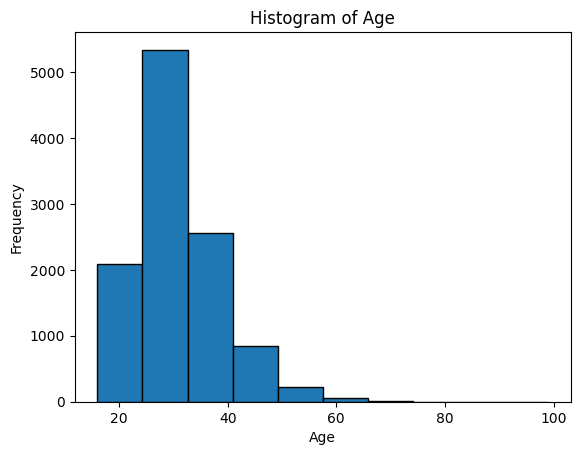

In [13]:
# your code goes here
# Crear el histograma de la columna 'Age'
plt.hist(df['Age'], bins=10, edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Mostrar el gráfico
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


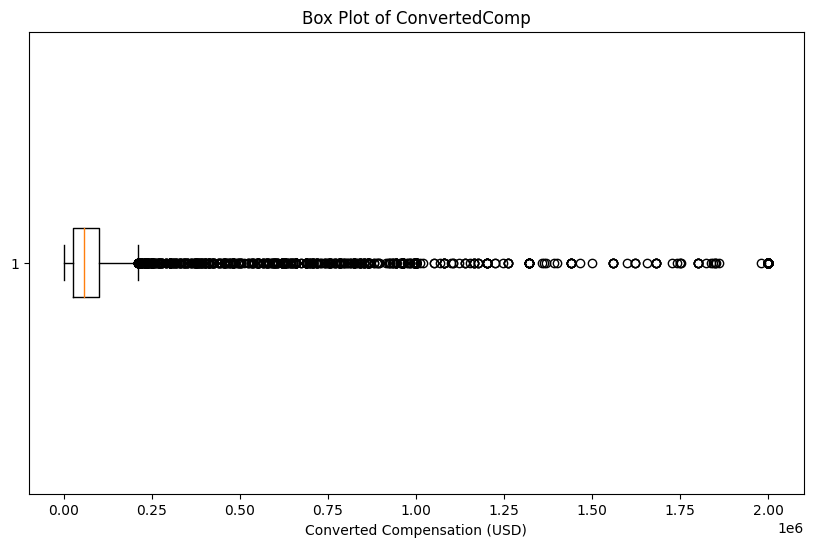

In [22]:
# Crear un diagrama de caja para la columna 'ConvertedComp'
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)

# Título y etiquetas del gráfico
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.show()



Find out the Inter Quartile Range for the column `ConvertedComp`.


In [23]:
# your code goes here
# Calcular el primer y tercer cuartil
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")


Q1 (25th percentile): 26868.0
Q3 (75th percentile): 100000.0
Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [24]:
# your code goes here
# Calcular el primer y tercer cuartil
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular los límites superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")


Límite inferior: -82830.0
Límite superior: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [25]:
# your code goes here
# Calcular el primer y tercer cuartil
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular los límites superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Contar el número de outliers
num_outliers = outliers.shape[0]

print(f"Número de outliers en la columna 'ConvertedComp': {num_outliers}")


Número de outliers en la columna 'ConvertedComp': 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
# your code goes here
# Calcular el primer y tercer cuartil
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular los límites superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Mostrar el número de filas antes y después de eliminar los outliers
print(f"Número de filas original: {df.shape[0]}")
print(f"Número de filas después de eliminar outliers: {df_no_outliers.shape[0]}")


Número de filas original: 11398
Número de filas después de eliminar outliers: 9703


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [3]:
# your code goes here
# Seleccionar solo las columnas numéricas
numeric_df = df_no_outliers.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación entre 'Age' y todas las otras columnas numéricas
correlation_with_age = numeric_df.corr()['Age'].drop('Age')

# Mostrar las correlaciones
print(correlation_with_age)




NameError: name 'df_no_outliers' is not defined

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>


## Distribution
